In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as const
import copy
k = 1/(4 * np.pi * const.epsilon_0)

In [2]:
coords = np.mgrid[-25:26, -25:26]

In [3]:
ygrid = coords[0,:,:]
xgrid = coords[1,:,:]

In [113]:
class Charge:
    def __init__ (self,x,y,q):
        self.x = x
        self.y = y
        self.q = q
        return
    def potential(self,xgrid,ygrid):
        r = np.hypot((xgrid - self.x),(ygrid - self.y))
        return (k* self.q / r)
    def electricfield(self,xgrid,ygrid):
        x = xgrid - self.x
        y = ygrid - self.y
        theta = np.arctan(y/x)
        r = np.hypot((xgrid -self.x),(ygrid-self.y))
        mag = k* self.q / r**2
        xField = np.cos(theta) * mag
        yField = np.sin(theta) * mag
        return (xField, yField)
    def singleField(self,x_point,y_point):
        x = x_point - self.x
        y = y_point - self.y
        theta = np.arctan(y/x)
        r = np.hypot(x,y)
        mag = k * self.q / (r**2)
        xField = np.cos(theta) * mag
        yField = np.sin(theta) * mag
        return (xField, yField)

In [5]:
#HW1

In [6]:
chargelist = [Charge(-2, 0, -1), Charge(2,0,1) ]

In [7]:
np.seterr(divide = 'ignore') 
#potential returns a 2d array Potential[x][y] where x corresponds to rows and y to columns
Potential = chargelist[0].potential(xgrid,ygrid) + chargelist[1].potential(xgrid,ygrid)

In [8]:
gradPotential = np.gradient(Potential)

In [9]:
def secondgradient(Field):
    ydim, xdim = Field.shape
    # newField = np.zeros((2,ydim,xdim))
    newyField = copy.deepcopy(Field)
    newxField = copy.deepcopy(Field)
    for i in range(xdim):
        for j in range(ydim):
            if(i == 0):
                newyField[i][j] = Field[i+1][j] - Field[i][j]
            if(i == ydim - 1):
                newyField[i][j] = Field[i][j] - Field[i-1][j]
            if(j == 0):
                newxField[i][j] = Field[i][j+1] - Field[i][j]
            if(j == xdim - 1):
                newxField[i][j] = Field[i][j] - Field[i][j-1]
    for i in range(1,ydim-1):
        for j in range(xdim):
            newyField[i][j] = (Field[i+1][j] - Field[i-1][j]) / 2
    for i in range(ydim):
        for j in range(1,xdim-1):
            newxField[i][j] = (Field[i][j+1] - Field[i][j-1]) / 2

    # newyField[1][0] = (Field[2][0] - Field[0][0]) / 2
    return [newyField,newxField]

In [10]:
twograd = secondgradient(Potential)

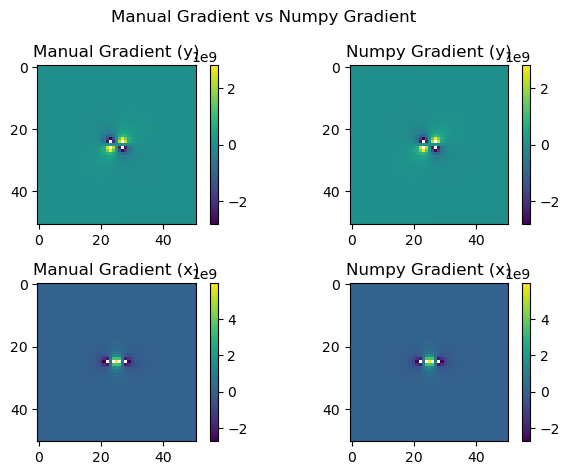

In [11]:
fig, ax = plt.subplots(2,2)
plt.suptitle("Manual Gradient vs Numpy Gradient")
Ay = ax[0,0].imshow(twograd[0])
ax[0,0].set_title("Manual Gradient (y)")
By = ax[0,1].imshow(gradPotential[0])
ax[0,1].set_title("Numpy Gradient (y)")
Ax = ax[1,0].imshow(twograd[1])
ax[1,0].set_title("Manual Gradient (x)")
Bx = ax[1,1].imshow(gradPotential[1])
ax[1,1].set_title("Numpy Gradient (x)")

fig.colorbar(Ay)
fig.colorbar(By)
fig.colorbar(Ax)
fig.colorbar(Bx)
plt.tight_layout()
plt.show()

In [12]:
#HW 2

In [13]:
np.seterr(divide = 'ignore') 
eField0 = chargelist[0].electricfield(xgrid,ygrid) #+ chargelist[1].electricfield(xgrid,ygrid)
eField1 = chargelist[1].electricfield(xgrid,ygrid)
eField = (eField0[0] + eField1[0], eField0[1] + eField1[1])

/var/folders/jj/8x_n1j9n0092tt4yr8mpqdb40000gn/T/ipykernel_1121/1465370098.py:13: RuntimeWarning: invalid value encountered in divide
  theta = np.arctan(y/x)


/var/folders/jj/8x_n1j9n0092tt4yr8mpqdb40000gn/T/ipykernel_1121/2265465474.py:2: RuntimeWarning: invalid value encountered in divide
  yFieldError = (eField[1] + gradPotential[0])/eField[1]


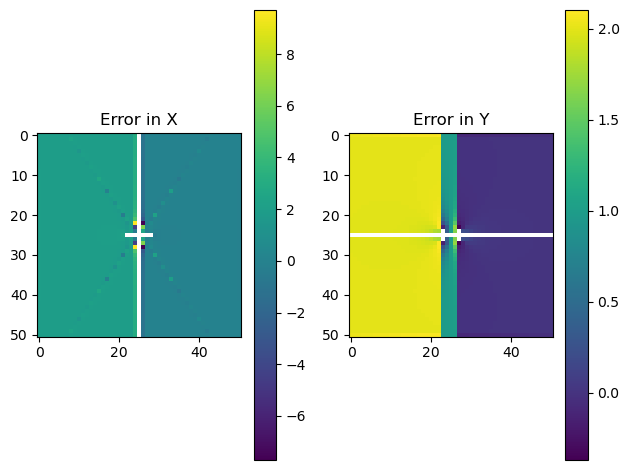

In [14]:
xFieldError = (eField[0] + gradPotential[1])/eField[0]
yFieldError = (eField[1] + gradPotential[0])/eField[1]
fig, ax = plt.subplots(1,2)
X = ax[0].imshow(xFieldError)
ax[0].set_title("Error in X")
Y = ax[1].imshow(yFieldError)
ax[1].set_title("Error in Y")
fig.colorbar(X)
fig.colorbar(Y)
plt.tight_layout()
plt.show()

In [15]:
#HW 3

In [16]:
def fullprint(*args, **kwargs):
  from pprint import pprint
  import numpy
  opt = numpy.get_printoptions()
  numpy.set_printoptions(threshold=numpy.inf)
  pprint(*args, **kwargs)
  numpy.set_printoptions(**opt)

In [17]:
def pointField(x,y, ChargeList):
    xField = 0
    yField = 0
    for charge in ChargeList:
        x, y = charge.singleField(x,y)
        xField = xField + x
        yField = yField + y
    return (xField, yField)

In [87]:
def drawLine(x, y, v_x, v_y):
    Line = np.array([[x,y]])
    step = .1
    x = v_x * step + x
    y = v_y * step + y
    while(x > -25 and x < 25 and y > -25 and y < 25):
        if(np.around(x, decimals=1) == 10 and np.around(y,decimals = 2) == 0):
            break
        if(np.around(x, decimals=1) == -10 and np.around(y,decimals = 2) == 0):
            break
        Line = np.append(Line, [[x,y]], axis = 0)
        largex = (pointField(x,y,chargelist)[0] * step / k)
        largey = (pointField(x,y,chargelist)[1] * step / k)
        magnitude = np.sqrt(largex**2 + largey**2)
        x = x + largex / magnitude * step
        y = y + largey / magnitude * step
    return Line

In [108]:
#redefining to make gap larger

chargelist = [Charge(-10, 0, -10), Charge(10,0,10) ]
Potential = chargelist[0].potential(xgrid,ygrid) + chargelist[1].potential(xgrid,ygrid)

In [109]:
Line1 = drawLine(10,0,-1,0)
Line2 = drawLine(10,0,0,-10)

In [112]:
fullprint(Line2)

array([[ 1.00000000e+01,  0.00000000e+00],
       [ 1.00000000e+01, -1.00000000e+00],
       [ 9.90012477e+00, -9.95006238e-01],
       [ 9.80024953e+00, -9.90012477e-01],
       [ 9.70037430e+00, -9.85018715e-01],
       [ 9.60049906e+00, -9.80024953e-01],
       [ 9.50062383e+00, -9.75031192e-01],
       [ 9.40074860e+00, -9.70037430e-01],
       [ 9.30087336e+00, -9.65043668e-01],
       [ 9.20099813e+00, -9.60049906e-01],
       [ 9.10112290e+00, -9.55056145e-01],
       [ 9.00124766e+00, -9.50062383e-01],
       [ 8.90137243e+00, -9.45068621e-01],
       [ 8.80149719e+00, -9.40074860e-01],
       [ 8.70162196e+00, -9.35081098e-01],
       [ 8.60174673e+00, -9.30087336e-01],
       [ 8.50187149e+00, -9.25093575e-01],
       [ 8.40199626e+00, -9.20099813e-01],
       [ 8.30212102e+00, -9.15106051e-01],
       [ 8.20224579e+00, -9.10112290e-01],
       [ 8.10237056e+00, -9.05118528e-01],
       [ 8.00249532e+00, -9.00124766e-01],
       [ 7.90262009e+00, -8.95131004e-01],
       [ 7.

In [110]:
x1_val = [x+25 for x in [coord[0] for coord in Line1]]
y1_val = [x+25 for x in [coord[1] for coord in Line1]] 

x2_val = [x+25 for x in [coord[0] for coord in Line2]]
y2_val = [x+25 for x in [coord[1] for coord in Line2]] 

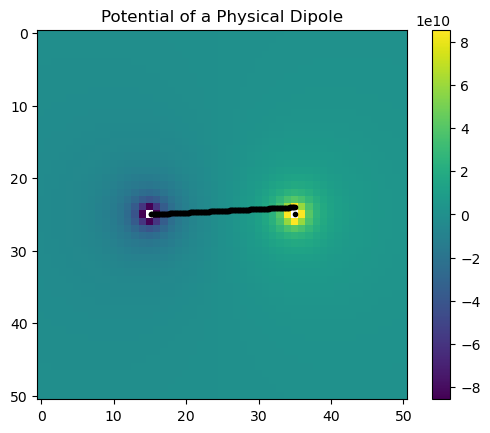

In [111]:
fig, ax = plt.subplots()
plt.imshow(Potential)
plt.colorbar()
plt.title("Potential of a Physical Dipole")
# plt.plot(x1_val, y1_val, "k.", lw=0)
plt.plot(x2_val, y2_val, "k.", lw=0)

plt.show()